In [8]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
simulation_dir = os.path.join(parent_dir, "optimize_rl")

sys.path.insert(0, simulation_dir)

c:\coding\project\LVR-Diamond-DynamicBeta


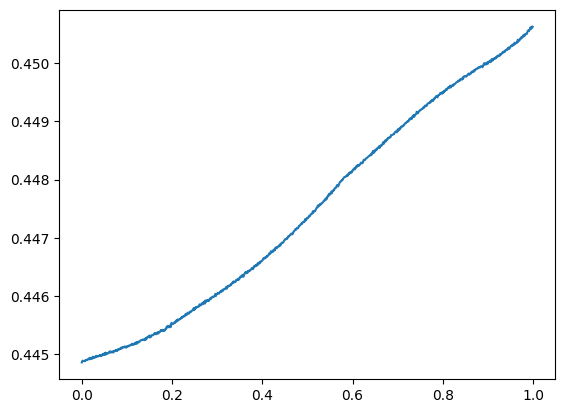

In [97]:
# Plot the model
import numpy as np
import matplotlib.pyplot as plt
import torch

from PPO import ActorCritic

device = 'cpu'
ppo_agent = ActorCritic(1,1,1,0.00001).to(device)
ppo_agent.action_var= ppo_agent.action_var.to(device)
ppo_agent.load_state_dict(torch.load("../optimize_rl/PPO_preTrained/LVR/PPO_LVR_0_0_3.pth"))


beta = []
for i in np.arange(0,1,0.001):
    state = torch.from_numpy(np.array([i]).astype(np.float32))
    state = state.to(device)  # move the state to the same device as the model
    action,_,_ = ppo_agent.act(state)
    # print(action)
    beta.append(action[0])  # move the action to the CPU and convert it to a NumPy array

plt.plot(np.arange(0,1,0.001), beta)

In [77]:
import pandas as pd

result = pd.read_csv("results/result.csv")
result_new_liquidity = pd.read_csv("results/result_new_liquidity.csv")

num_pools = 3
pool_names = ['CFMM', 'Diamond', 'Dynamic Diamond']

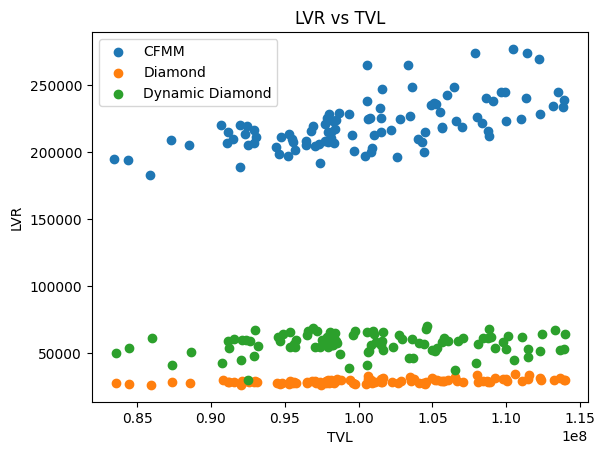

In [78]:
plt.figure()
plt.title('LVR vs TVL')
plt.xlabel('TVL')
plt.ylabel('LVR')

for i in range(num_pools):
    pool = i+1
    TVL = result['TVL_'+str(pool)]
    LVR = result['LVR_'+str(pool)]
    plt.scatter(TVL, LVR, label=pool_names[i])

plt.legend()

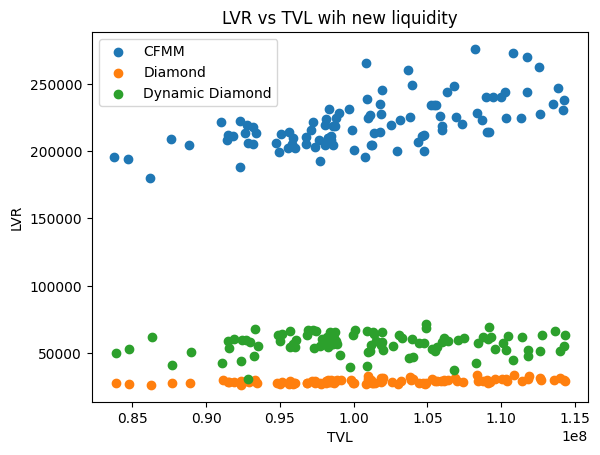

In [79]:
plt.figure()
plt.title('LVR vs TVL wih new liquidity')
plt.xlabel('TVL')
plt.ylabel('LVR')

for i in range(num_pools):
    pool = i+1
    TVL = result_new_liquidity['TVL_'+str(pool)]
    LVR = result_new_liquidity['LVR_'+str(pool)]
    plt.scatter(TVL, LVR, label=pool_names[i])

plt.legend()

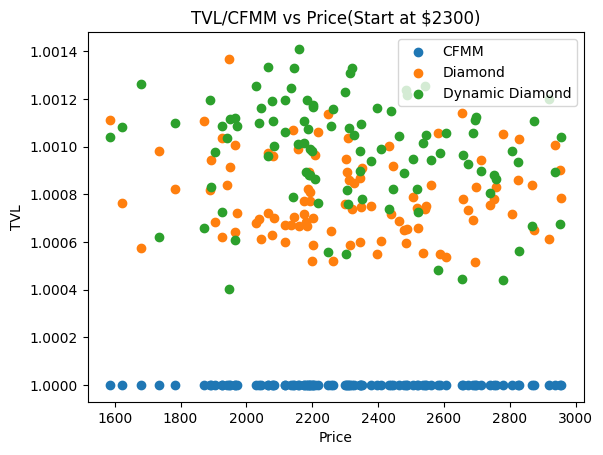

In [94]:
plt.figure()
plt.title('TVL/CFMM vs Price(Start at $2300)')
plt.xlabel('Price')
plt.ylabel('TVL')

for i in range(num_pools):
    pool = i+1
    TVL = result['TVL_'+str(pool)] / result['TVL_1']
    Price = result['Price']
    plt.scatter(Price, TVL, label=pool_names[i])

plt.legend()

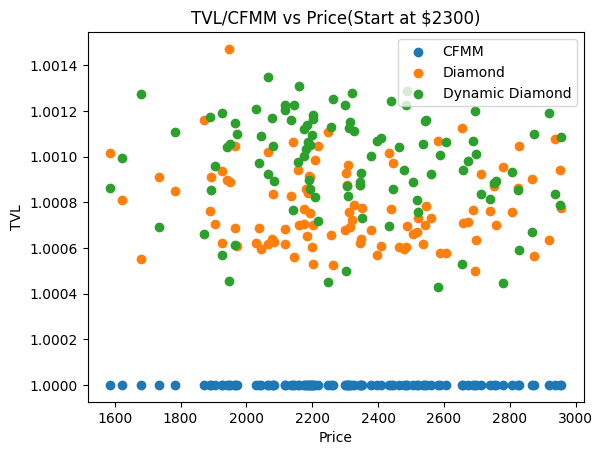

In [95]:
plt.figure()
plt.title('TVL/CFMM vs Price(Start at $2300)')
plt.xlabel('Price')
plt.ylabel('TVL')

for i in range(num_pools):
    pool = i+1
    TVL = result_new_liquidity['TVL_'+str(pool)] / result_new_liquidity['TVL_1']
    Price = result_new_liquidity['Price']
    plt.scatter(Price, TVL, label=pool_names[i])

plt.legend()